# <center>Template Matching</center>

### Introduction:

<p>Template Matching is a method for searching and finding the location of a template image in another input image that is larger in size. It is a simpler approach compared to key point detectors, local invariant descriptors, etc, and works great for exact object matches, with exact lighting/scale/angle.</p>

<p>The method invloves sliding the template image over the input image (as in 2D convolution) and comparing the template and patch of input image under the template image. From this, we get a grayscale image where each pixel denotes how much the neighbourhood of the pixel matches with the template. From this, we can get the point that has maximum correspondence and hence draw the bounding rectangle over the input image.</p>

<p>The Opencv function we use to get the grayscale image from the 2 input images is cv2.matchTemplate(). The parameters it takes are given below.</p>

<center><b>cv2.matchTemplate(image, templ, method[, result]) → result</b></center>

<ul>
<li><b>image</b> - Image on which the search is running. It must be 8-bit or 32-bit floating-point.</li>
<li><b>templ</b> - The template image which we search for. It must be of the same data type as image and also smaller in size.</li>
<li><b>method</b> - Parameter specifying the comparison method.</li>
<li><b>result</b> - Map of comparison results. It must be single channel 32-bit floating point. If image is of size W x H and templ is of size w x h, then result is of size (W - w + 1) x (H - h + 1).</li>
</ul>

<p>The formulae of the various comparison methods are given below (I denotes image, T template, R result). The summation is done over template and/or the image patch: x' = 0...w-1, y' = 0...h-1</p>

<ul>
<li>
<b>method=CV_TM_SQDIFF</b>

<center>\begin{array}{l} R(x,y)= \sum _{x',y'} (T(x',y')-I(x+x',y+y'))^2 \end{array}</center>
</li>

<li>
<b>method=CV_TM_SQDIFF_NORMED</b>

<center>\begin{array}{l} R(x,y)= \frac{\sum_{x',y'} (T(x',y')-I(x+x',y+y'))^2}{\sqrt{\sum_{x',y'}T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2}} \end{array}</center>
</li>

<li>
<b>method=CV_TM_CCORR</b>

<center>\begin{array}{l} R(x,y)= \sum _{x',y'} (T(x',y')  \cdot I(x+x',y+y')) \end{array}</center>
</li>

<li>
<b>method=CV_TM_CCORR_NORMED</b>

<center>\begin{array}{l} R(x,y)= \frac{\sum_{x',y'} (T(x',y') \cdot I(x+x',y+y'))}{\sqrt{\sum_{x',y'}T(x',y')^2 \cdot \sum_{x',y'} I(x+x',y+y')^2}} \end{array}</center>
</li>

<li>
<b>method=CV_TM_CCOEFF</b>

<center>\begin{array}{l} R(x,y)= \sum _{x',y'} (T'(x',y')  \cdot I'(x+x',y+y')) \end{array}</center>

where

\begin{array}{l} T'(x',y')=T(x',y') - 1/(w  \cdot h)  \cdot \sum _{x'',y''} T(x'',y'') \\ I'(x+x',y+y')=I(x+x',y+y') - 1/(w  \cdot h)  \cdot \sum _{x'',y''} I(x+x'',y+y'') \end{array}
</li>

<li>
<b>method=CV_TM_CCOEFF_NORMED</b>

<center>\begin{array}{l} R(x,y)= \frac{ \sum_{x',y'} (T'(x',y') \cdot I'(x+x',y+y')) }{ \sqrt{\sum_{x',y'}T'(x',y')^2 \cdot \sum_{x',y'} I'(x+x',y+y')^2} } \end{array}</center>
</li>
</ul>

<p>These formulae are given just for reference and you probably won't be required to remember them. We shall now go into implementation and see how each of these methods perform.</p>

## Implementation

<p>First we import the necessary modules</p>

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


<p>image.jpg is our main image and template.jpg is our template image. Let us read and display them. We also get the width and height of the template ( required for drawing the box).
</p>

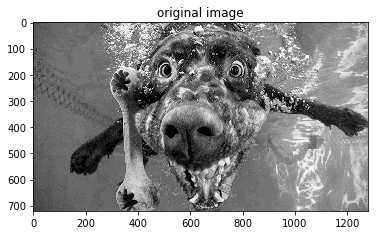

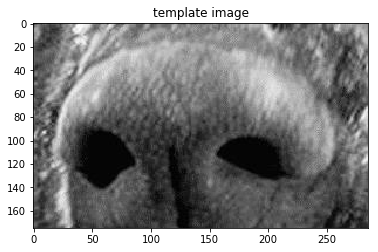

In [2]:
img2 = cv2.imread('image.jpg',0)
template = cv2.imread('template.jpg',0)
w, h = template.shape[::-1]

plt.imshow(img2,'gray')
plt.title('original image')
plt.show()

plt.imshow(template,'gray')
plt.title('template image')
plt.show()
 

<p>Note: The images displayed above are scaled versions. In reality,the nose of the dog in both images have same width and height</p>

In [3]:
# We now create a list of all the different comparison methods
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

<p>Now we execute the function using each of the above methods.</p>

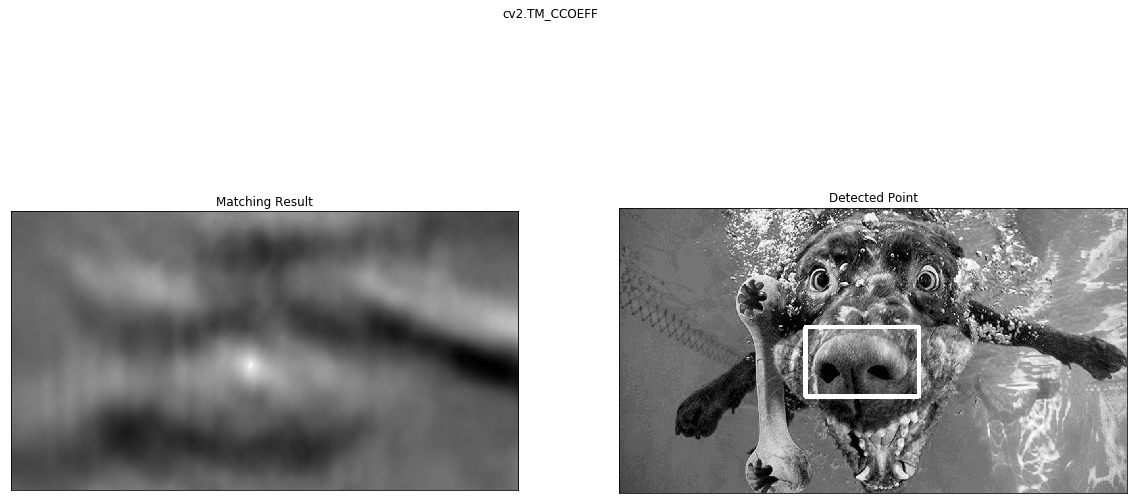

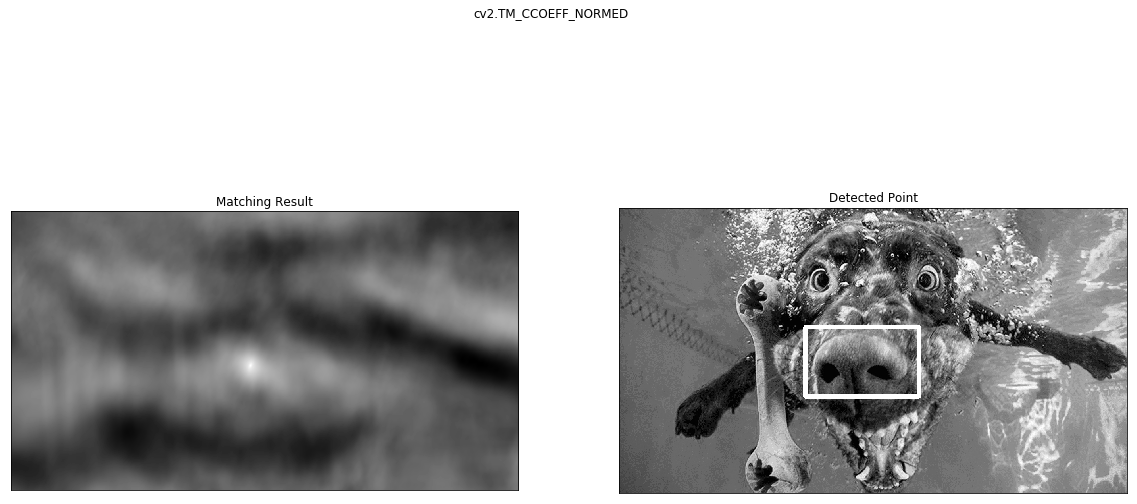

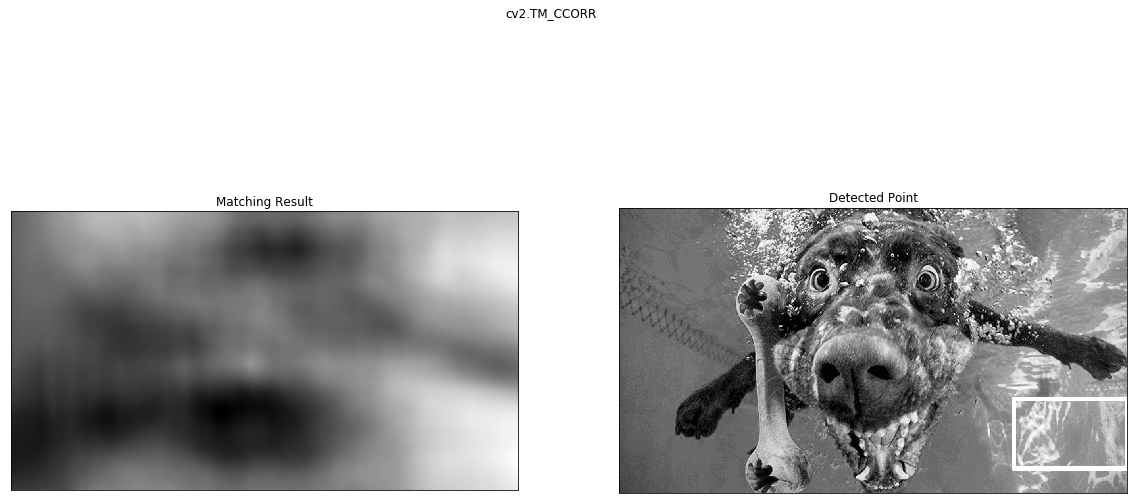

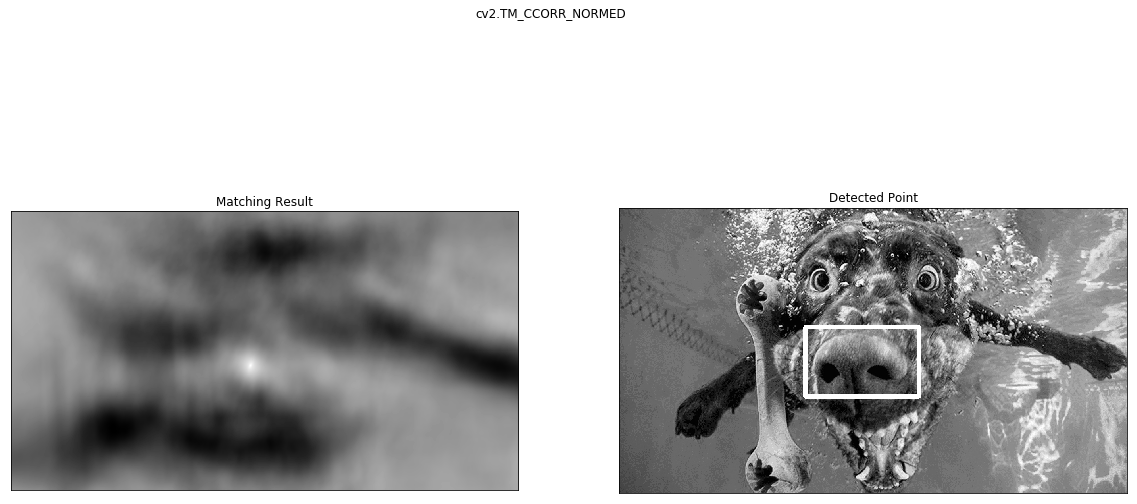

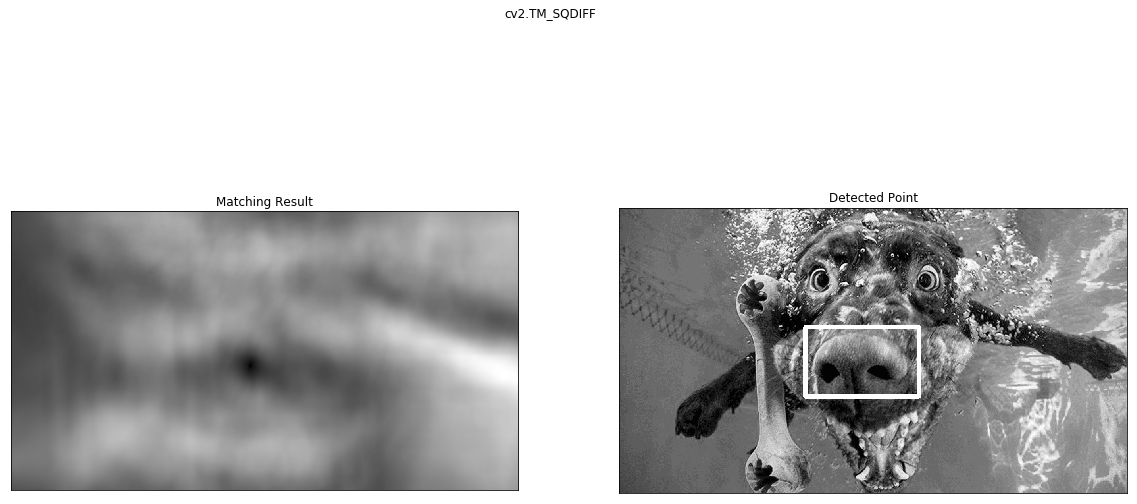

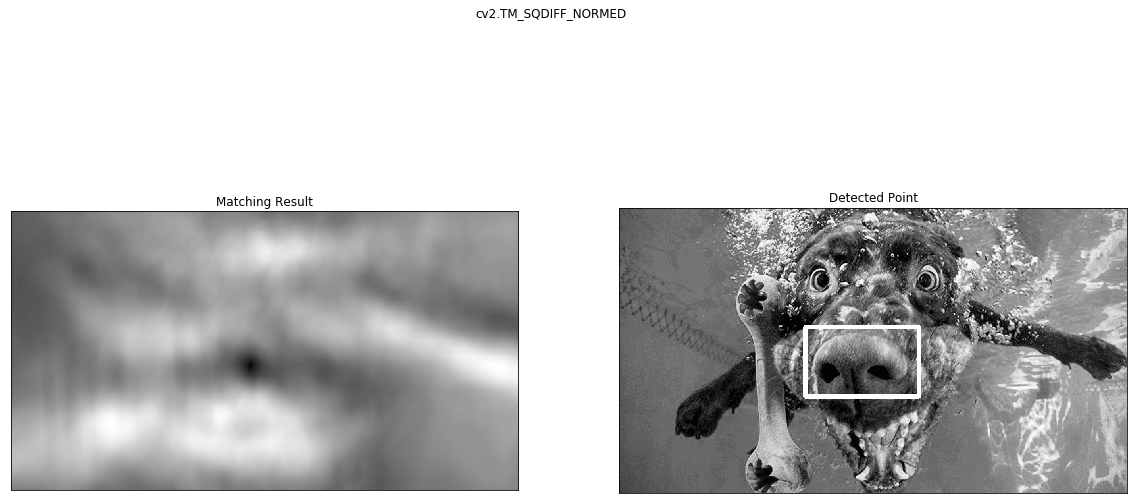

In [4]:

for meth in methods:
    # We create a copy of the image as we draw the bounding rectangle on img
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching with the current comparison method
    res = cv2.matchTemplate(img,template,method)
    
    # We now find the locations of the maximum and minimum value pixels in the map created by matchTemplate function
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Now we get the top left corner of bounding rectangle.
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED the minimum value point gives maximum correspondence.
    # For the remaining methods, maximum value point gives maximum correspondence.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    # Get the bottom right corner of rectangle from the top left using width and height of template image. Then draw
    # the rectangle.
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 10)
    
    # Now we plot res and the identified rectangle for each of the methods.
    plt.figure(figsize=(20,10))
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    
    plt.show()

## Template Matching with Multiple Objects

<p>The cv2.matchTemplate() function can also be used to detect multiple occurences of the template image in the given image. This can be done by setting a threshold over the grayscale image outputed by the function, rather than just using the maximum/minimum valued point.</p>

<p>Let us work with color images this time. First we read the 2 input images and display them. We also get size of the template </p>

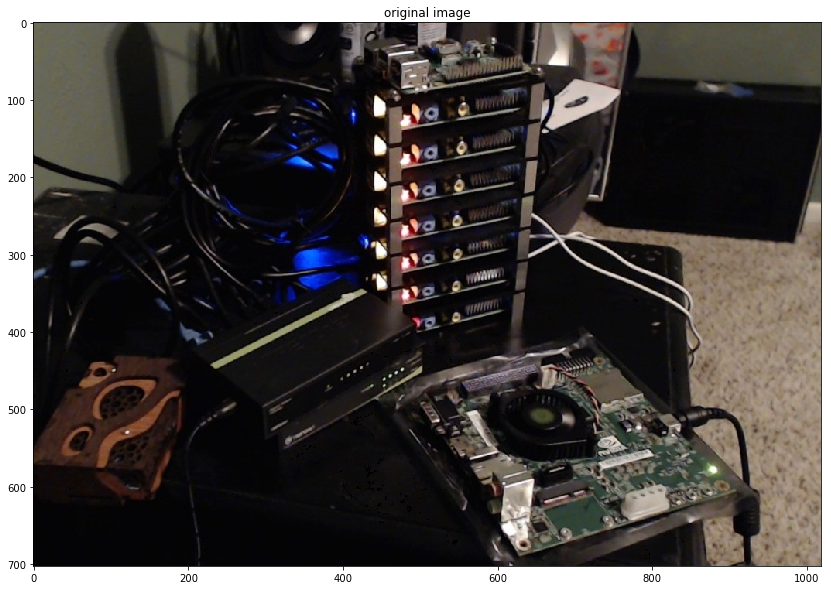

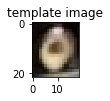

In [5]:
img_bgr = cv2.imread('multiple_image.jpg',1)
templ_bgr = cv2.imread('multiple_template.jpg',1)

w,h,_ = templ_bgr.shape

# While displaying using matplotlib, we must remember to convert the bgr image (as read by opencv) 
# to rgb (as read by matplotlib)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('original image')
plt.show()

# Our template is one of the yellow ports 
plt.figure(figsize=(2,1))
plt.imshow(cv2.cvtColor(templ_bgr, cv2.COLOR_BGR2RGB))
plt.title('template image')
plt.show()


<p>Now we convert both images to grayscale and then use the function cv2.matchTemplate()</p>

In [6]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
templ_gray = cv2.cvtColor(templ_bgr, cv2.COLOR_BGR2GRAY)

multi_res = cv2.matchTemplate(img_gray,templ_gray,cv2.TM_CCOEFF_NORMED)

<p>Now, from the result obtained, we choose only those point where there is more than 80% similarity to the template. We then draw rectangles with these points as the top left corners, over the main bgr image.</p>

In [7]:
threshold = 0.8
loc = np.where(multi_res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_bgr, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

<p>The final image we obtain after detecting is shown below.</p>

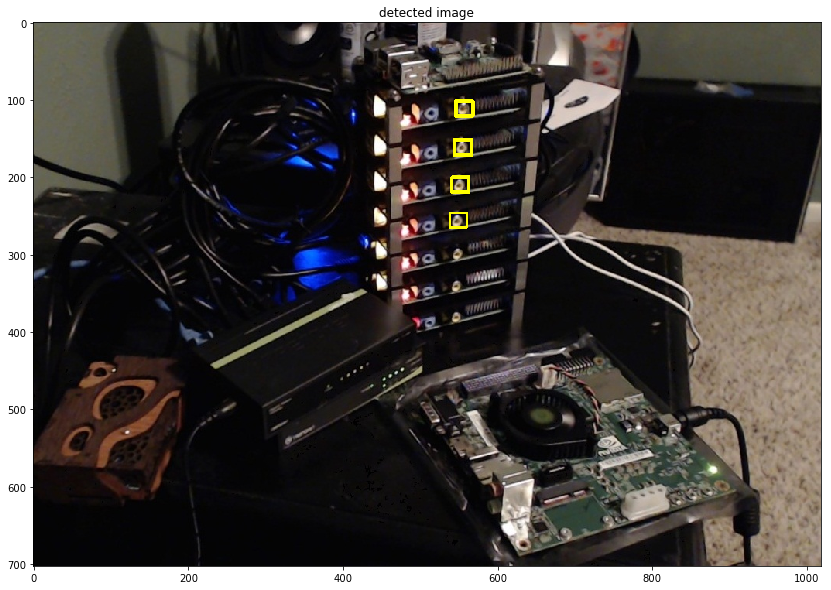

In [8]:
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('detected image')
plt.show()

<p>We see that we have got only 4 of the 7 matches. This is because our template image was got by cropping just one of the 7 ports. Hence, it had slight variations compared to the remaining 6 ports, in terms of viewing angle, lighting, etc. So, only those ports that had a match of more than 80% (our threshold) were selected. You may now try  experimenting with the threshold. You will observe that as you decrease the threshold, more and more false positives get detected.</p>   

## Multi-scale Template Matching

<p>The cv2.matchTemplate() function is by definition translation invariant. It is not ideal for matching rotated objects, scaled objects or objects that exhibit non-affine transformations. However, we can extend it to make it more robust to changes in scaling.</p>

<p>The technique we use is as follows: </p>
<ul>
<li>Loop over the input image at different scales, making it progressively smaller in each iteration.</li>
<li>Apply template matching for each scale,and keep track of the match with the largest correlation coefficient (along with the x, y-coordinates of the region with the largest correlation coefficient).</li>
<li>After looping over all scales, take the region with the largest correlation coefficient and use that as your “matched” region.</li>
</ul>

## Implementation

<p>We additionally use the imutils module for resizing here.</p>

In [9]:
import imutils

<p>Now we read the template and the image, convert both to grayscale and also get the template's dimensions. Additionally, since our template is rigid and well-formed, we do template matching using the corresponding edge maps (obtained by Canny edge detection) in order to get better results.</p> 

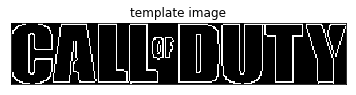

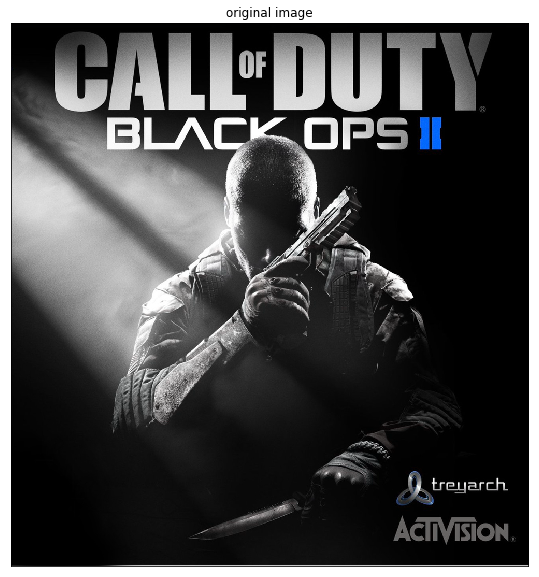

In [14]:
template1 = cv2.imread('cod_logo.png')
template1 = cv2.cvtColor(template1, cv2.COLOR_BGR2GRAY)
template1 = cv2.Canny(template1, 50, 200)
(tH, tW) = template1.shape[:2]
plt.imshow(template1,'gray')
plt.title('template image'), plt.xticks([]), plt.yticks([])
plt.show()


image1 = cv2.imread('cod_blackops_2.jpg')
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,10))
plt.imshow(image1,'gray')
plt.title('original image'), plt.xticks([]), plt.yticks([])
plt.show()

<p>We now loop over various scales of image1, starting from 0.1 times the actual size to 100% of actual size. In each iteration, we do edge detection for that scaled image and then use template matching over it. We use a book-keeping variable "found" to store the overall maximum correlation we were able to attain, the position where it occured and also the scale for which it occured.</p>

In [16]:
found = None

# loop over the scales of the image
for scale in np.linspace(0.1, 1.0, 20)[::-1]:
    # resize the image according to the scale, and keep track
    # of the ratio of the resizing
    resized = imutils.resize(gray1, width = int(gray1.shape[1] * scale))
    r = gray1.shape[1] / float(resized.shape[1])

    # if the resized image is smaller than the template, then break from the loop (as template matching can't be done)
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break
    
    # detect edges in the resized, grayscale image and apply template
    # matching to find the template in the image
    edged = cv2.Canny(resized, 50, 200)
    result = cv2.matchTemplate(edged, template1, cv2.TM_CCOEFF)
    
    # get the best correlation for that scale
    (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

    # if we have found a new overall maximum correlation value, then update the book-keeping variable
    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r)

<p>We now unpack the bookkeeping varaible and compute the (x, y) coordinates of the bounding box based on the resized ratio.</p>

In [17]:
(_, maxLoc, r) = found

# top left corner of bounding rectangle
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))

# bottom right corner of bounding rectangle
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))

<p>Finally, draw the rectangle and display the detected image</p>

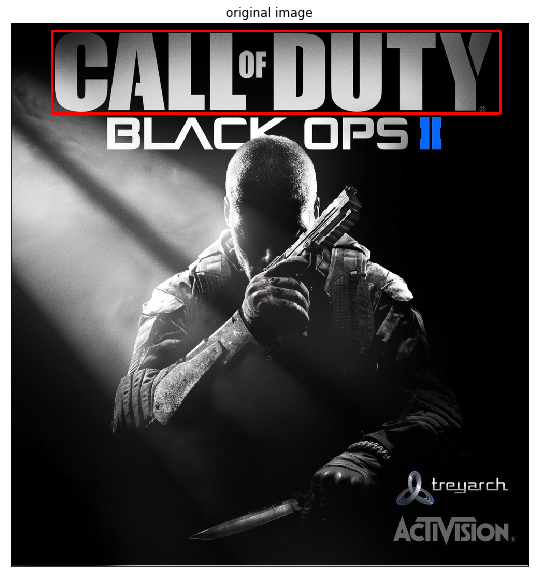

In [20]:
cv2.rectangle(image1, (startX, startY), (endX, endY), (255, 0, 0), 4)
plt.figure(figsize=(20,10))
plt.imshow(image1,'gray')
plt.title('original image'), plt.xticks([]), plt.yticks([])
plt.show()

<p>You can now try executing the above code by using the other call of duty posters in this file. Each of these have the logo with a different size.
You may also try to use template matching to detect rotated objects, in an approach similar to what we have used above.</p>

## Links and references

<ul>
<li>Opencv-Python-Tutorials: http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html#py-template-matching</li>
<li>https://pythonprogramming.net/template-matching-python-opencv-tutorial/</li>
<li>Multi-Scale Template Matching: http://www.pyimagesearch.com/2015/01/26/multi-scale-template-matching-using-python-opencv/</li>
<li>Download Imutils Package here: https://pypi.python.org/pypi/imutils/0.4.3</li>
</ul>